# Test with sentence_transformer


# Imports

In [1]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
import os
import pickle

# Read Data Files


In [2]:
project_base_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
project_base_path

'/media/ANONYMOUS/Files/projects/FALCON'

In [3]:
gpt4o_generated_cti_path = os.path.join(
    project_base_path, "data/generation/yara/yara-rules_v1.pkl"
)
gpt4o_generated_cti_path

'/media/ANONYMOUS/Files/projects/FALCON/data/generation/yara/yara-rules_v1.pkl'

In [4]:
def load_from_pickle(file_path):
    """
    Loads data from a pickle file.

    :param file_path: Path to the pickle file
    :return: Loaded data
    """
    try:
        with open(file_path, "rb") as file:
            return pickle.load(file)
    except Exception as e:
        print(f"Error loading data from pickle: {e}")
        return None

In [5]:
# Load the data back from the pickle file
file_path = gpt4o_generated_cti_path

gpt_yara_cti_dict = load_from_pickle(file_path)
size = len(gpt_yara_cti_dict.keys())
print(size)

4588


In [6]:
def get_first_n_elements(dictionary: dict, n: int) -> dict:
    """
    Get the first n elements of a dictionary.

    :param dictionary: The input dictionary
    :param n: The number of elements to retrieve
    :return: A dictionary with the first n elements
    """
    return dict(list(dictionary.items())[:n])

In [7]:
yara_cti_sample_dict = get_first_n_elements(gpt_yara_cti_dict, 10)

In [8]:
yara_cti_sample_dict

{'rule MSIETabularActivex\n{\n        meta:\n                ref = "CVE-2010-0805"\n                impact = 7\n                hide = true\n                author = "@d3t0n4t0r"\n        strings:\n                $cve20100805_1 = "333C7BC4-460F-11D0-BC04-0080C7055A83" nocase fullword\n                $cve20100805_2 = "DataURL" nocase fullword\n                $cve20100805_3 = "true"\n        condition:\n                ($cve20100805_1 and $cve20100805_3) or (all of them)\n}': 'Rule Name\n  MSIETabularActivex\n\nDescription\n  This YARA rule detects a specific vulnerability (CVE-2010-0805) associated with an ActiveX control. The rule targets potentially malicious strings that could be used in exploit attempts related to this vulnerability.\n\nReference\n  CVE-2010-0805\n\nIndicators / String Matches\n  This rule matches the following strings:\n\n  String ID\tPattern\tNotes\n  $cve20100805_1\t"333C7BC4-460F-11D0-BC04-0080C7055A83"\tActiveX control CLSID\n  $cve20100805_2\t"DataURL"\tPos

In [9]:
yaras, ctis = zip(*yara_cti_sample_dict.items())
yaras = list(yaras)
ctis = list(ctis)

In [10]:
len(yaras), len(ctis)

(10, 10)

# Environment Setup


### sentence-transformers/all-MiniLM-L6-v2

In [30]:
# Load SBERT model
model = SentenceTransformer("/media/ANONYMOUS/Files/models/sentence-transformers/all-MiniLM-L6-v2")

# Step 1: Encode descriptions and rules
desc_embeddings = model.encode(ctis, convert_to_tensor=True)  # [num_desc x 384]
rule_embeddings = model.encode(yaras, convert_to_tensor=True)  # [num_rules x 384]

### sentence-transformers/all-mpnet-base-v2

In [11]:
# Load SBERT model
model = SentenceTransformer('/media/ANONYMOUS/Files/models/sentence-transformers/all-mpnet-base-v2')

# Step 1: Encode descriptions and rules
desc_embeddings = model.encode(ctis, convert_to_tensor=True)  # [num_desc x 768]
rule_embeddings = model.encode(yaras, convert_to_tensor=True)        # [num_rules x 768]

### intfloat/e5-base-v2

In [11]:
# Load SBERT model
model = SentenceTransformer('/media/ANONYMOUS/Files/models/intfloat/e5-base-v2')

# Step 1: Encode descriptions and rules
desc_embeddings = model.encode(ctis, convert_to_tensor=True)  # [num_desc x 768]
rule_embeddings = model.encode(yaras, convert_to_tensor=True)        # [num_rules x 768]

# Embedding Test


In [12]:
desc_embeddings.shape

torch.Size([10, 768])

In [13]:
rule_embeddings.shape

torch.Size([10, 768])

In [14]:
# Step 2: Compute dot product matrix [num_desc x num_rules]
dot_product_matrix = torch.matmul(desc_embeddings, rule_embeddings.T)

# Step 3: Apply softmax along rules axis (dim=1), to get attention weights from each description to all rules
attention_weights = F.softmax(dot_product_matrix, dim=1).cpu().numpy()

# Plot Attention

### sentence-transformers/all-MiniLM-L6-v2

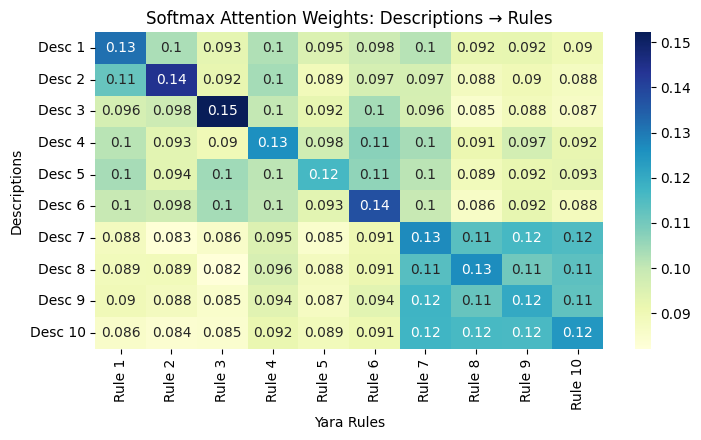

In [34]:
# Step 4: Plot attention heatmap
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu", 
            xticklabels=[f"Rule {i+1}" for i in range(len(yaras))], 
            yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
plt.title("Softmax Attention Weights: Descriptions → Rules")
plt.xlabel("Yara Rules")
plt.ylabel("Descriptions")
plt.tight_layout()
plt.show()

### sentence-transformers/all-mpnet-base-v2

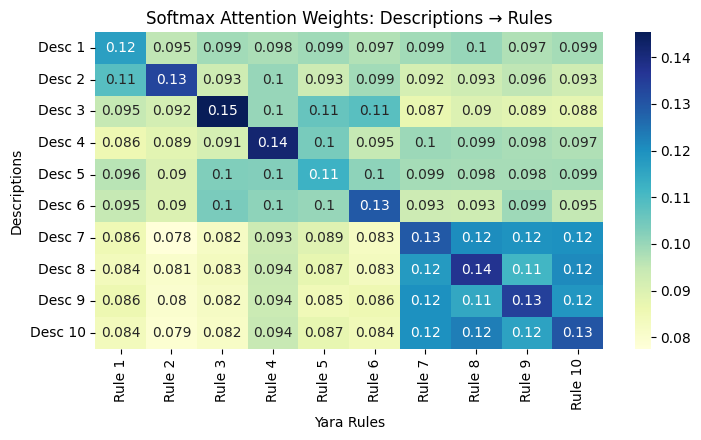

In [15]:
# Step 4: Plot attention heatmap
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu", 
            xticklabels=[f"Rule {i+1}" for i in range(len(yaras))], 
            yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
plt.title("Softmax Attention Weights: Descriptions → Rules")
plt.xlabel("Yara Rules")
plt.ylabel("Descriptions")
plt.tight_layout()
plt.show()

### intfloat/e5-base-v2

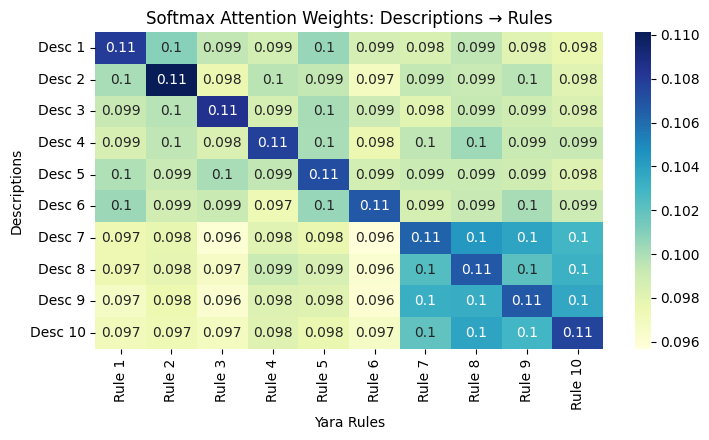

In [15]:
# Step 4: Plot attention heatmap
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu", 
            xticklabels=[f"Rule {i+1}" for i in range(len(yaras))], 
            yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
plt.title("Softmax Attention Weights: Descriptions → Rules")
plt.xlabel("Yara Rules")
plt.ylabel("Descriptions")
plt.tight_layout()
plt.show()